## Лабораторная работа 3

Классификация в sklearn. Метрики классификации

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

1. Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [29]:
import pandas as pd
import numpy as np
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import probplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [9]:
# Считывание датасета
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [10]:
# Получение типов колонок 1 вариант
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### Описание датасета

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female



1. Многоклассовая классификация:

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). (пример):

In [86]:
# Функция условной градации классов на основании рейтинга
def class_rating(r):
    if r > (max(data_exp['meanfreq']) / 3) :
        c = 1
    elif r < (max(data_exp['meanfreq']) / 3) and r > (max(data_exp['meanfreq']) / 4):
        c = 2
    elif r < (max(data_exp['meanfreq']) / 5):
        c = 3
    else:
        c = 0
    return c

# Функция условной бинарной градации записей на основании рейтига
def binary_ratio(r):
    if r > 50:
        c = 'High'
    else:
        c = 'Low'
    return c

# Функция определениея точности в %
def evaluate(P, T):
    # P - Предсказанные значение
    # T - Истинные значения
    # accuracy = correct predictions / all predictions
    accuracy = np.mean(P == T)
    return accuracy*100

In [13]:
data = pd.read_csv("voice.csv")


In [14]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


1. Многоклассовая классификация:

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). (пример):

In [16]:
# Преобразуем данные и добавляем условыне классы на основании рейтинга Rating
data_exp = data.copy()
max(data_exp['meanfreq'])

0.251123758720282

In [18]:
data_exp['Class_Rating'] = data_exp.apply(lambda row: class_rating(row['meanfreq']), axis = 1)
data_exp = data_exp.drop(columns = ['centroid', 'label'], axis = 1)
data_exp.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Class_Rating
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,2
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,2
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [19]:
max(data_exp['Class_Rating'])    

3

In [26]:
data_exp.shape

(3168, 20)

In [27]:
# Делим набор данных
X = data_exp.iloc[:, 0:19].values
Y = data_exp.iloc[:, 19].values



In [31]:
# Формируем обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)

In [32]:
X_train.shape, X_test.shape

((2376, 19), (792, 19))

In [33]:
len(Y_train), len(Y_test)

(2376, 792)

In [39]:
# обучение
model_Tree = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
model_Tree.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

In [40]:
Y_Tree = model_Tree.predict(X_test)

In [41]:
compare = np.vstack([Y_Tree, Y_test]).T
compare

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [42]:
# Вычисление матрицы ошибок
# (i, j) элементы матрицы показывают число элементов класса `i` отнесённых классификатором к классу `j`
# i - строки
# j - столбцы
conf_mat_Tree = confusion_matrix(Y_test, Y_Tree)
conf_mat_Tree

array([[790,   0],
       [  0,   2]], dtype=int64)

<AxesSubplot:>

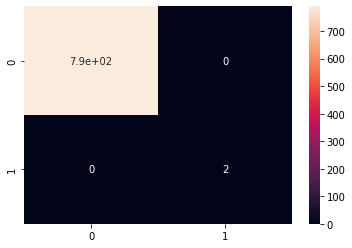

In [43]:
# Визуализация матрицы ошибок
sns.heatmap(conf_mat_Tree, annot=True)

In [44]:
# точность
print (f'Evaluate = {evaluate(Y_Tree, Y_test)}%')
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_Tree) * 100}%')

Evaluate = 100.0%
Accuracy = 100.0%


In [45]:
report_Tree = classification_report(Y_test, Y_Tree)
print(report_Tree)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       790
           2       1.00      1.00      1.00         2

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



## sklearn.naive_bayes.GaussianNB

In [46]:
# Инициализиуем классификатор
model_Gauss = GaussianNB()
# Обучаем
model_Gauss.fit(X_train, Y_train)
# Предсказываем
Y_Gauss = model_Gauss.predict(X_test)
         
# Вычисление матрицы ошибок
conf_mat_Gauss = confusion_matrix(Y_test, Y_Gauss)
conf_mat_Gauss       

array([[779,  11],
       [  0,   2]], dtype=int64)

<AxesSubplot:>

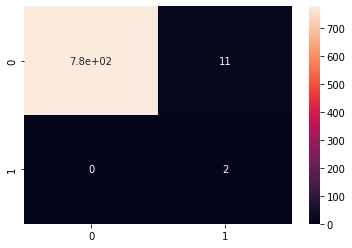

In [47]:
# Визуализация матрицы ошибок
sns.heatmap(conf_mat_Gauss, annot=True)

In [48]:
# точность
print (f'Evaluate = {evaluate(Y_Tree, Y_test)}%')
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_Tree) * 100}%')

Evaluate = 100.0%
Accuracy = 100.0%


In [49]:
report_Gauss = classification_report(Y_test, Y_Gauss)
print(report_Gauss)

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       790
           2       0.15      1.00      0.27         2

    accuracy                           0.99       792
   macro avg       0.58      0.99      0.63       792
weighted avg       1.00      0.99      0.99       792



## sklearn.neighbors.KNeighborsClassifier
Параметры:

n_neighbors - Количество соседей, используемых по умолчанию для запросов соседей.

In [50]:
# Проверим на 5 соседях
model_KNBC = KNeighborsClassifier(n_neighbors = 5)
model_KNBC.fit(X_train, Y_train)
Y_KNBC = model_KNBC.predict(X_test)
  
accuracy_score(Y_test, Y_KNBC) 

0.9974747474747475

In [51]:
# Выполним автоматический подбор оптимального количества соседей
best_n_count = 0
max_accuracy = 0

for i in range(1, 128):
    tmp_model_KNBC = KNeighborsClassifier(n_neighbors = i)
    tmp_model_KNBC.fit(X_train, Y_train)
    predict_i = tmp_model_KNBC.predict(X_test)
    ac = accuracy_score(Y_test, predict_i)
    if ac > max_accuracy:
        max_accuracy = ac
        best_n_count = i
        
# Выполним оценку для оптимального количества соседей
optimal_model_KNBC = KNeighborsClassifier(n_neighbors = best_n_count)
optimal_model_KNBC.fit(X_train, Y_train)
Y_KNBCO = optimal_model_KNBC.predict(X_test)

# Оптимальное количество соседей
print (f'Оптимальное количество соседей = {best_n_count}')
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_KNBCO) * 100}%')

Оптимальное количество соседей = 1
Accuracy = 99.74747474747475%


In [52]:
# Визуализация матрицы ошибок
conf_mat_KNBCO = confusion_matrix(Y_test, Y_KNBCO)
conf_mat_KNBCO

array([[790,   0],
       [  2,   0]], dtype=int64)

<AxesSubplot:>

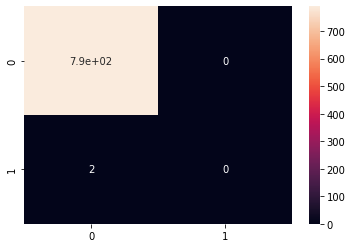

In [53]:
sns.heatmap(conf_mat_KNBCO, annot=True)

In [54]:
# Нормализованные данные
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_KNBCM = KNeighborsClassifier(n_neighbors = best_n_count)
model_KNBCM.fit(X_train_M, Y_train)

Y_KNBCM = model_KNBCM.predict(X_test_M)

# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_KNBCM) * 100}%')

Accuracy = 99.62121212121212%


2. Бинарная классификация.

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

In [79]:
data2 = pd.read_csv('cwurData.csv')


# Описание датасета
world_rank  - world rank for university

institution - name of university

country - country of each university

national_rank - rank of university within its country

quality_of_education - rank for quality of education

alumni_employment - rank for alumni employment

quality_of_faculty - rank for quality of faculty

publications - rank for publications

influence - rank for influence

citations - number of students at the university

In [80]:
data2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [81]:
data2= data2.drop(columns=['country', 'broad_impact']) 
data2.dtypes

world_rank                int64
institution              object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
year                      int64
dtype: object

In [97]:
# Преобразуем данные и добавляем условыне классы на основании рейтинга Avg_viewer_ratio
data_binary = data2.copy()
data_binary['Binary_Ratio'] = data_binary.apply(lambda row: binary_ratio(row['score']), axis = 1)
data_binary = data_binary.drop(columns = ['world_rank', 'institution'], axis = 1)

data_binary.head()

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,Binary_Ratio
0,1,7,9,1,1,1,1,5,100.00,2012,High
1,2,9,17,3,12,4,4,1,91.67,2012,High
2,3,17,11,5,4,2,2,15,89.50,2012,High
3,1,10,24,4,16,16,11,50,86.17,2012,High
4,4,2,29,7,37,22,22,18,85.21,2012,High


In [98]:
# Делим набор данных
XB = data_binary.iloc[:, 0:10].values
YB = data_binary.iloc[:, 10].values

# Формируем обучающую и тестовую выборки
XB_train, XB_test, YB_train, YB_test = train_test_split(XB, YB, test_size = 0.25, random_state = 25)

In [99]:
model_LR = LogisticRegression()
    
model_LR.fit(XB_train, YB_train)
Y_Log = model_LR.predict(XB_test)

# accuracy
print (f'Accuracy = {accuracy_score(YB_test, Y_Log) * 100}%')

Accuracy = 99.45454545454545%


In [100]:
# Визуализация матрицы ошибок
cf_Log = confusion_matrix(YB_test, Y_Log)
cf_Log

array([[ 73,   3],
       [  0, 474]], dtype=int64)

<AxesSubplot:>

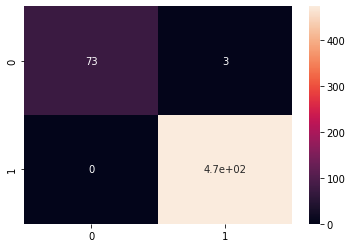

In [101]:
sns.heatmap(cf_Log, annot=True)

In [102]:
# Нормализованные данные
scaler = StandardScaler()
XB_train_M = scaler.fit_transform(XB_train)
XB_test_M = scaler.transform(XB_test)

model_LogM = LogisticRegression()
    
model_LogM.fit(XB_train_M, YB_train)
Y_LogM = model_LogM.predict(XB_test_M)
        
accuracy_score(YB_test, Y_LogM)

# accuracy
print (f'Accuracy = {accuracy_score(YB_test, Y_LogM) * 100}%')

Accuracy = 98.9090909090909%


3. Использование нормализации признаков 

В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [96]:
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_KNBC) * 100}%')
print (f'Accuracy StandardScaler = {accuracy_score(Y_test, Y_KNBCM) * 100}%')

print (f'Binary Accuracy = {accuracy_score(YB_test, Y_Log) * 100}%')
print (f'Binary Accuracy StandardScaler = {accuracy_score(YB_test, Y_LogM) * 100}%')

Accuracy = 99.74747474747475%
Accuracy StandardScaler = 99.62121212121212%
Binary Accuracy = 99.45454545454545%
Binary Accuracy StandardScaler = 98.9090909090909%


# Вывод

Для данных наборов разности почти нет